In [78]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [79]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [80]:
cast = pd.read_csv(r'D:\Downloads\pycon-pandas-tutorial-master\data\cast.csv')
print(cast.head())

                  title  year      name   type                character     n
0        Closet Monster  2015  Buffy #1  actor                  Buffy 4  31.0
1       Suuri illusioni  1985    Homo $  actor                   Guests  22.0
2   Battle of the Sexes  2017   $hutter  actor          Bobby Riggs Fan  10.0
3  Secret in Their Eyes  2015   $hutter  actor          2002 Dodger Fan   NaN
4            Steve Jobs  2015   $hutter  actor  1988 Opera House Patron   NaN


In [81]:
release_dates = pd.read_csv(
    r'D:\Downloads\pycon-pandas-tutorial-master\data\release_dates.csv',
    parse_dates=['date'],
    infer_datetime_format=True,
)
release_dates['month'] = release_dates['date'].dt.strftime('%b')
release_dates['day'] = release_dates['date'].dt.dayofweek
release_dates['dayname'] = release_dates['date'].dt.day_name()
release_dates['month_number'] = release_dates['date'].dt.month
print(release_dates.head())

C:\Users\addis\AppData\Local\Temp\ipykernel_40396\1972475482.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  release_dates = pd.read_csv(


                    title  year      country       date month  day    dayname  \
0   #73, Shaanthi Nivaasa  2007        India 2007-06-15   Jun    4     Friday   
1                   #BKKY  2016     Cambodia 2017-10-12   Oct    3   Thursday   
2                 #Beings  2015      Romania 2015-01-29   Jan    3   Thursday   
3               #Captured  2017          USA 2017-09-05   Sep    1    Tuesday   
4  #Ewankosau saranghaeyo  2015  Philippines 2015-01-21   Jan    2  Wednesday   

   month_number  
0             6  
1            10  
2             1  
3             9  
4             1  


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

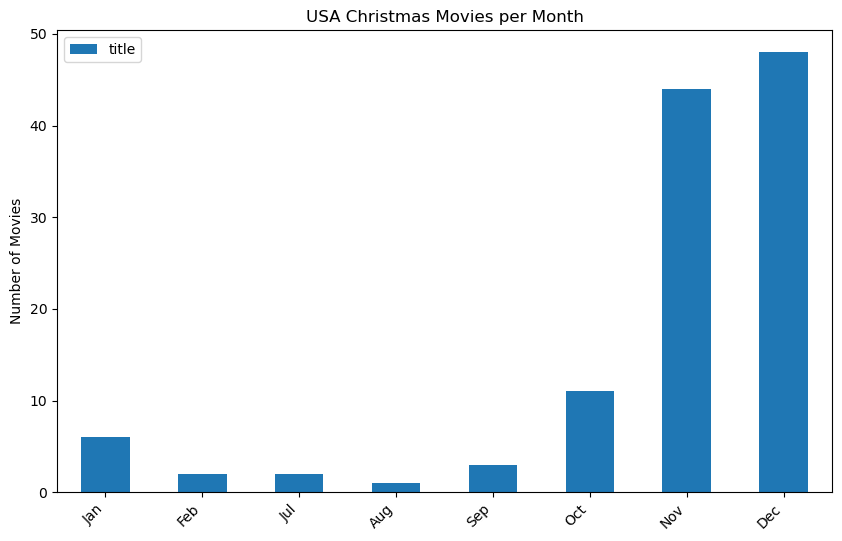

In [82]:
usa_christmas_movies = (
    release_dates
    .loc[(release_dates['title']
         .str
         .contains('Christmas',
                   case=False, 
                   na=False)) &
        (release_dates['country'] == 'USA')]
)

usa_christmas_movies_pivot = (
    usa_christmas_movies.
    pivot_table(
        index=['month', 'month_number'],
        values='title',
        aggfunc='count'
    )
    .reset_index()
    .sort_values('month_number')
)

usa_christmas_movies_pivot.set_index('month')['title'].plot(kind='bar', figsize=(10, 6))
plt.legend()
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Movies')
plt.title('USA Christmas Movies per Month')
plt.show()

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

<Axes: xlabel='month'>

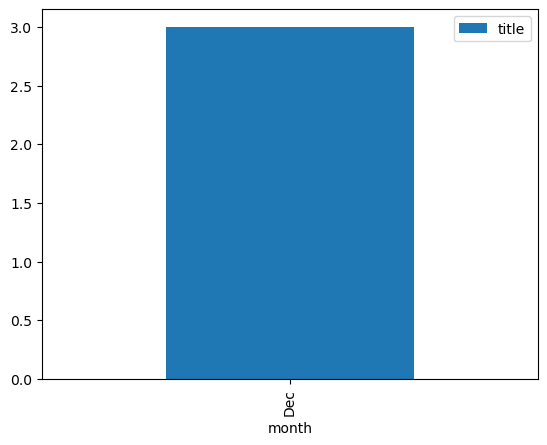

In [83]:
usa_hobbit_movies = (
    release_dates.loc[
        (
            release_dates['title']
            .str.startswith('The Hobbit'
                        ) 
        )
        &
        (
            release_dates['country'] == 'USA'
        )
    ]
)

usa_hobbit_movies_pivot = (
    usa_hobbit_movies.
    pivot_table(
        index='month',
        values='title',
        aggfunc='count'
    )
)

usa_hobbit_movies_pivot.plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

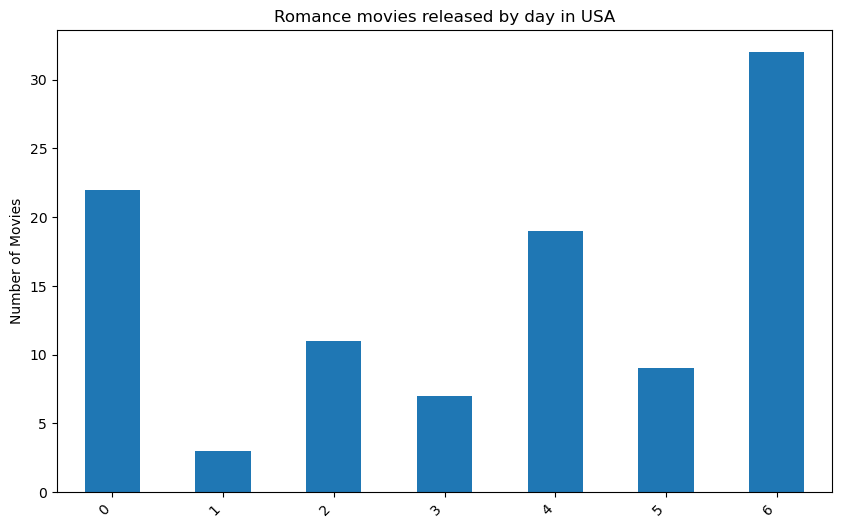

In [84]:
romance_movies = (
    release_dates
    .loc[
        (release_dates['title']
         .str
         .contains('Romance',
                   case=False, 
                   na=False)) &
        (release_dates['country'] == 'USA')
                   ]
    
)

romance_movies_pivot = (
    romance_movies.
    pivot_table(index='day',
                values='title',
                aggfunc='count')
)

romance_movies_pivot.plot(kind='bar', figsize=(10, 6))
plt.legend().remove()
plt.title('Romance movies released by day in USA')
plt.xlabel('')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

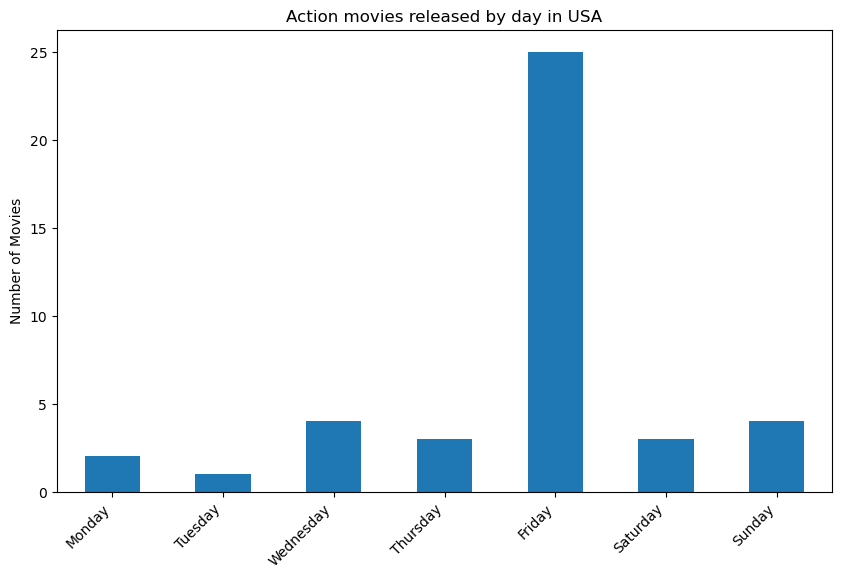

In [85]:
action_movies = (
    release_dates.loc[
        (
                release_dates['title']
            .str
            .contains(
                'Action',
                case=False,
                na=False
            )
        ) &
        (
            release_dates['country'] == 'USA'
        )
    ]
)

action_movies_pivot = (
    action_movies.
    pivot_table(
        index=['day', 'dayname'],
        aggfunc={
            'title': 'count'
        }
    )
    .reset_index()
    .sort_values('day')
)

action_movies_pivot.set_index('dayname')['title'].plot(kind='bar', figsize=(10, 6))
plt.legend().remove()
plt.title('Action movies released by day in USA')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Movies')
plt.show()

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [86]:
cast_release_merged = pd.merge(cast, 
                               release_dates, 
                               on=['title', 'year'],
                               how='inner')
judi_dench_movies = (
    cast_release_merged
    .loc[cast_release_merged['name']
         .str
         .contains('Judi Dench',
                   na=False, 
                   case=False)]
                   )

judi_dench_movies_1990usa = (
    judi_dench_movies
    .loc[(judi_dench_movies['year']
         .between(1990, 1999)
         ) &
         (judi_dench_movies['country'] == 'USA')]
         )

judi_dench_movies_1990usa.sort_values('year', ascending=True)

,title,year,name,type,character,n,country,date,month,day,dayname,month_number
14085621,GoldenEye,1995,Judi Dench,actress,M,6.0,USA,1995-11-17,Nov,4,Friday,11
14085820,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0,USA,1996-03-22,Mar,4,Friday,3
14085660,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,USA,1996-12-25,Dec,2,Wednesday,12
14085937,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0,USA,1997-10-03,Oct,4,Friday,10
14086904,Tomorrow Never Dies,1997,Judi Dench,actress,M,9.0,USA,1997-12-19,Dec,4,Friday,12
14086402,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0,USA,1999-01-08,Jan,4,Friday,1
14086602,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2.0,USA,1999-05-14,May,4,Friday,5
14086831,The World Is Not Enough,1999,Judi Dench,actress,M,6.0,USA,1999-11-19,Nov,4,Friday,11


### In which months do films with Judi Dench tend to be released in the USA?

<Axes: xlabel='month'>

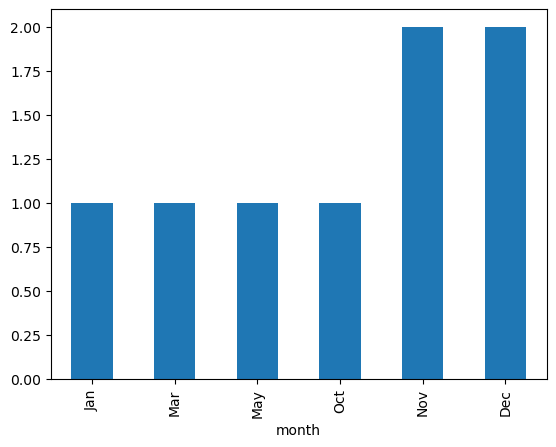

In [87]:
judi_dench_month = (judi_dench_movies_1990usa.pivot_table(
    index=['month', 'month_number'],
    values='title',
    aggfunc='count'
)
    .reset_index()
    .sort_values('month_number'))

judi_dench_month.set_index('month')['title'].plot(kind='bar')

In [88]:
judi_dench_month

,month,month_number,title
1,Jan,1,1
2,Mar,3,1
3,May,5,1
5,Oct,10,1
4,Nov,11,2
0,Dec,12,2


### In which months do films with Tom Cruise tend to be released in the USA?

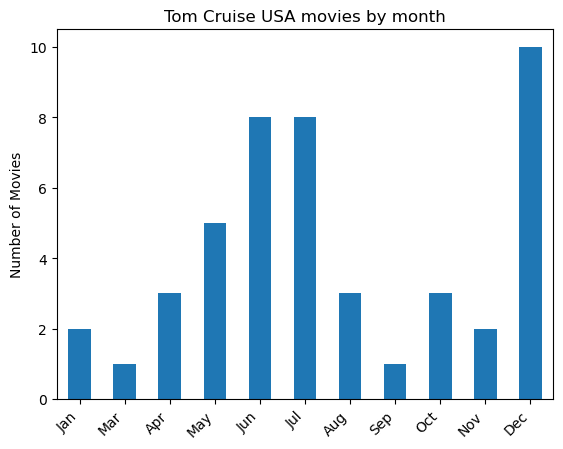

In [92]:
tom_cruise_movies = (
    cast_release_merged.
    loc[
        (cast_release_merged['name']=='Tom Cruise') &
        (cast_release_merged['country'] == 'USA')
    ]
)



tom_cruise_pivot = (
    tom_cruise_movies
    .pivot_table(
        index=['month', 'month_number'],
        values='title',
        aggfunc='count'
    )
    .reset_index()
    .sort_values('month_number')
)

tom_cruise_pivot.set_index('month')['title'].plot(kind='bar')
plt.xlabel('')
plt.xticks(rotation= 45, ha='right')
plt.ylabel('Number of Movies')
plt.title('Tom Cruise USA movies by month')
plt.legend().remove()
plt.show()